# The Heat Equation

## Heat equation in 1D

\begin{equation}
\frac{\partial u(x,t)}{\partial t}
= \frac{\partial}{\partial x}\left(\kappa(x)\frac{\partial u(x,t)}{\partial x}\right)
+ \psi(x,t)
\end{equation}

For a homogeneous material $\kappa(x)=\kappa$, in which case the above reduces to

\begin{equation}
\frac{\partial u(x,t)}{\partial t}
= \kappa\frac{\partial^2 u(x,t)}{\partial x^2}
+ \psi(x,t)
\end{equation}

## Boundary conditions

Initial condition:

\begin{equation}
  u(x,0) = \phi(x)
\end{equation}

Dirichlet boundary conditions at $x=0$ and $x=L$:

\begin{align}
  u(0,t) &= f_{1}(t) \\
  u(L,t) &= f_{2}(t)
\end{align}

Neumann boundary conditions at $x=0$ and $x=L$:

\begin{align}
  \frac{\partial u}{\partial x}(0,t) &= g_{1}(t) \\
  \frac{\partial u}{\partial x}(L,t) &= g_{2}(t)
\end{align}

Periodic boundary conditions at $x=0$ and $x=L$:

\begin{align}
  u(0,t) = u(L,t)
\end{align}

## Forward Time Centered Space (FTCS)

**A. Space-Time Grid**

Construct a discretized spatial grid from $x_\mathrm{min}=0$ to $x_\mathrm{max}=L$, with $N$ grid cells. The grid spacing is then given by

\begin{align}
  \Delta{x} = \frac{x_\mathrm{max} - x_\mathrm{min}}{N} = \frac{L}{N}
\end{align}

Choosing a vertex-centered grid, there are $N+1$ grid points (bracketing the $N$ grid cells). The physical boundary points $x=x_\mathrm{min}=0$ and $x=x_\mathrm{max}=L$ coincide with the computational grid boundary points $x_{0}$ and $x_{N}$. In addition, construct a discretized time grid with stepsize $\Delta{t}$.

\begin{align}
  & x \quad\rightarrow\quad x_{j} = x_\mathrm{min} + j\Delta{x} \quad,\quad j=0,\ldots,N \\
  & t \quad\rightarrow\quad t_{n} = n\Delta{t}
\end{align}

**B. Grid Functions**

\begin{align}
  & u(x,t) \quad\rightarrow\quad u^{n}_{j} \\
  & \psi(x,t) \quad\rightarrow\quad \psi^{n}_{j}
\end{align}

**C. Derivatives**

Use forward differencing for time derivative

\begin{align}
  \frac{\partial u}{\partial t} 
  \quad\rightarrow\quad \frac{u(x_{j},t_{n}+\Delta{t}) - u(x_{j},t_{n})}{\Delta{t}}
  \quad\rightarrow\quad \frac{u^{n+1}_{j} - u^{n}_{j}}{\Delta{t}}
\end{align}

Use centered differencing for spatial derivatives

\begin{align}
  &\frac{\partial u}{\partial x} 
  \quad\rightarrow\quad 
  \frac{u(x_{j}+\Delta{x},t_{n}) - u(x_{j}-\Delta{x},t_{n})}{2\Delta{x}}
  \quad\rightarrow\quad \frac{u^{n}_{j+1} - u^{n}_{j-1}}{2\Delta{x}} 
  \\
  &\frac{\partial^2 u}{\partial x^2} 
  \quad\rightarrow\quad 
  \frac{u(x_{j}+\Delta{x},t_{n}) - 2u(x_{j},t_{n}) + u(x_{j}-\Delta{x},t_{n})}{(\Delta{x})^2}
  \quad\rightarrow\quad \frac{u^{n}_{j+1} - 2u^{n}_{j} + u^{n}_{j-1}}{(\Delta{x})^2}
\end{align}

**D. Equation**

The 1D heat equation becomes

\begin{align}
  &\frac{u^{n+1}_{j} - u^{n}_{j}}{\Delta{t}}
  - \kappa\frac{u^{n}_{j+1} - 2u^{n}_{j} + u^{n}_{j-1}}{(\Delta{x})^2} = \psi^{n}_{j} \\
  \\
  &\Rightarrow\quad
  u^{n+1}_{j} = u^{n}_{j}
  + \frac{\kappa\Delta{t}}{(\Delta{x})^2}\left(u^{n}_{j+1} - 2u^{n}_{j} + u^{n}_{j-1} 
  + \frac{(\Delta{x})^2}{\kappa}\psi^{n}_{j}\right)
\end{align}

**E. Initial-Boundary Conditions**

Initial condition becomes

\begin{align}
  u(x,0) = \phi(x) 
  \quad\rightarrow\quad u^{0}_{j} = \phi_{j}
\end{align}

Dirichlet boundary conditions become

\begin{align}
  &u(0,t) = f_{1}(t) \quad\rightarrow\quad u^{n}_{0} = f^{n}_{1} \\
  &u(L,t) = f_{2}(t) \quad\rightarrow\quad u^{n}_{N} = f^{n}_{2}
\end{align}

Using centered differencing at boundary of the compuational domain, Neumann boundary conditions become

\begin{align}
  &\frac{\partial u}{\partial x}(0,t) = g_{1}(t)
  \quad\rightarrow\quad \frac{u^{n}_{1} - u^{n}_{-1}}{2\Delta{x}} = g^{n}_{1}
  \quad\Rightarrow\quad u^{n}_{-1} = u^{n}_{1} - 2(\Delta{x})g^{n}_{1} 
  \\
  &\frac{\partial u}{\partial x}(L,t) = g_{2}(t)
  \quad\rightarrow\quad \frac{u^{n}_{N+1} - u^{n}_{N-1}}{2\Delta{x}} = g^{n}_{2}
  \quad\Rightarrow\quad u^{n}_{N+1} = u^{n}_{N-1} + 2(\Delta{x})g^{n}_{2} \\  
\end{align}

Note that $u^{n}_{-1}$ and $u^{n}_{N+1}$ would be defined at $x_{-1}$ and $x_{N+1}$, respectively. However, those points are not within the computational domain. Instead, the above conditions are used to eliminate $u^{n}_{-1}$ and $u^{n}_{N+1}$ when computing the boundary values $u^{n+1}_{0}$ and $u^{n+1}_{N}$ at the next time step. This yields

\begin{align}
  &u^{n+1}_{0} = u^{n}_{0} + \frac{2\kappa\Delta{t}}{(\Delta{x})^2}
  \left(u^{n}_{1} - u^{n}_{0} - (\Delta{x})g^{n}_{1}\right)
  \\
  &u^{n+1}_{N} = u^{n}_{N} + \frac{2\kappa\Delta{t}}{(\Delta{x})^2}
  \left(u^{n}_{N-1} - u^{n}_{N} - (\Delta{x})g^{n}_{2}\right)
\end{align}

Periodic boundary conditions imply

\begin{align}
  u(0,t) = u(L,t) \quad\Rightarrow\quad 
  \left\{
  \begin{array}{l}
    u^{n}_{0} = u^{n}_{N} \\
    u^{n}_{-1} = u^{n}_{N-1} \\
    u^{n}_{N+1} = u^{n}_{1}
  \end{array}
  \right.
\end{align}

As with Neumann boundary conditions, the above conditions are used to eliminate $u^{n}_{-1}$ and $u^{n}_{N+1}$ when computing the boundary values $u^{n+1}_{0}$ and $u^{n+1}_{N}$ at the next time step. This yields

\begin{align}
  &u^{n+1}_{0} = u^{n}_{0} + \frac{\kappa\Delta{t}}{(\Delta{x})^2}
  \left(u^{n}_{1} - 2u^{n}_{0} + u^{n}_{N-1}\right) = u^{n+1}_{N}
  \\
  &u^{n+1}_{N} = u^{n}_{N} + \frac{\kappa\Delta{t}}{(\Delta{x})^2}
  \left(u^{n}_{1} - 2u^{n}_{N} + u^{n}_{N-1}\right) = u^{n+1}_{0}
\end{align}

In [46]:
## ftcs ##

import numpy as np

# set parameters
kappa = 1.      # diffusion coefficient
xmin = 0.       # left boundary point
xmax = 1.       # right boundary point
L = xmax - xmin # size of spatial grid
N = 60          # number of grid cells
dx = L/N        # grid spacing
dt = 1.e-4      # size of time step
s = kappa*dt/dx**2 # Courant number

if s < 0.5:
    print('Solution is expected to be stable')
else:
    print('WARNING: Solution is expected to be unstable')

# initialize grid functions
uu = np.zeros(N+1) 

# set initial conditions
xloc = 0.25*L
uu[int(N*xloc)] = 1/dx # initial condition, delta function 

# set boundary conditions
# Dirichlet
uuL = 0 #left boundary, at x=0
uuR = 0 #right boundary, at x=L
# Neumann
#uuL = 0. #left boundary, at x=0
#uuR = 0. #right boundary, at x=L
# periodic
#uuL = 0. #left boundary, at x=0
#uuR = 0. #right boundary, at x=L
# check consistency of initial-boundary conditions
if (uu[0] != uuL):
    print('WARNING: initial-boundary conditions are not consistent (left boundary)')
if (uu[-1] != uuR):
    print('WARNING: initial-boundary conditions are not consistent (right boundary)')

# set loop and output variables
nstep = 300 # total number of time steps
pstep = 5   # number of time steps between printing
nout = 1 + nstep//pstep # number of snapshots that will be printed
print('Number of time steps is', nstep)
print('Number of snapshots that will be produced is', nout)
print('Number of spatial grid points is', N+1)
tdata = np.zeros(nout)                    # initialize time step output array
xdata = np.linspace(0, L, N+1)              # initialize xgrid output array
udata = np.zeros((len(tdata),len(xdata))) # initialize grid function output array

Solution is expected to be stable
Number of time steps is 300
Number of snapshots that will be produced is 61
Number of spatial grid points is 61


In [47]:
# print initial data to output arrays
tdata[0] = 0.
udata[0,:] = uu[:]

# reset print counter
iprint=1

# solve PDE
for istep in range(1,nstep+1):
    
    # update interior grid points
    uu[1:-1] = uu[1:-1] + s*(uu[2:] - 2*uu[1:-1] + uu[0:-2])

    # update boundary points (Dirichlet)
    uu[0] = 0  #left boundary, at x=0
    uu[-1] = 0 #right boundary, at x=L

    # update boundary points (Neumann)
    #uu[0] = uu[0] + 2*s*(uu[1] - uu[0])     #left boundary, at x=0
    #uu[-1] = uu[-1] + 2*s*(uu[-2] - uu[-1]) #right boundary, at x=L

    # update boundary points (periodic)
    #uu[0] = uu[0] + s*(uu[1] - 2*uu[0] + uu[-2])    #left boundary, at x=0
    #uu[-1] = uu[-1] + s*(uu[1] - 2*uu[-1] + uu[-2]) #right boundary, at x=L

    # print output
    if (istep % pstep == 0):
        # print time step
        tdata[iprint] = istep*dt
        # print grid functions
        udata[iprint,:] = uu[:] 
        # increment print counter
        iprint = iprint + 1

<IPython.core.display.Javascript object>


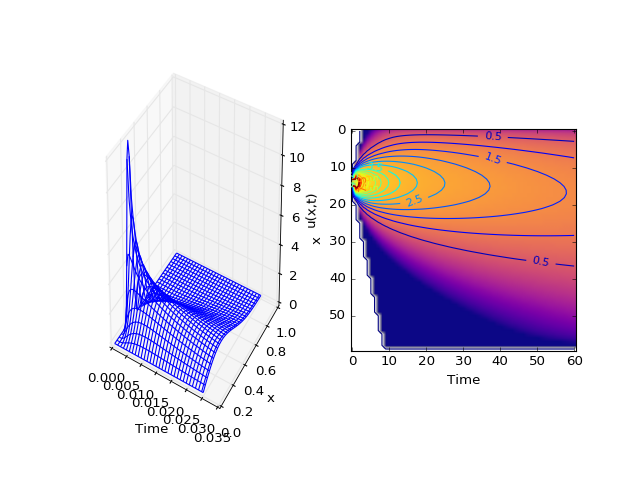

In [48]:
# plot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib notebook

fig = plt.figure()

X, T = np.meshgrid(xdata, tdata)

# wireframe plot
ax1 = fig.add_subplot(121, projection='3d')
istart = 1 # output iteration to start plot at 
ax1.plot_wireframe(T[istart:], X[istart:], udata[istart:,:], rstride=2, cstride=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('x')
ax1.set_zlabel('u(x,t)')

# contour plot
ax2 = fig.add_subplot(122, aspect='auto')
im = ax2.imshow(udata.T[istart:,:],
                norm=colors.LogNorm(vmin=0.01, vmax=10.),
                cmap=cm.plasma)
levels = np.arange(0, 10, 0.5)
cs = ax2.contour(udata.T[istart:,:], levels)
ax2.clabel(cs, levels[1::2], inline=True, fontsize=10, fmt='%1.1f')
ax2.set_xlabel('Time')
ax2.set_ylabel('x')

plt.show()